#**Iris Dataset | LGMVIP Task 1 | August21 | DataScience**

### Author: Nimra Khan

 **Introduction to data set**
 


- The Iris dataset contains the data for 50 flowers from each of the 3 species 
Setosa, Versicolor and Virginica.
- The data gives the measurements in centimeters of the following variables for each of the flowers:
  - Sepal length and width
  - Petal length and width
- The task it poses of discriminating between three species of Iris from measurements of their petals and sepals is simple but challenging.



**Attribute Information:**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa

-- Iris Versicolour

-- Iris Virginica

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#**LOADING THE DATASET**

In [8]:
# loading the csv data to a Pandas DataFrame
iris = pd.read_csv('/content/Iris.csv')

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
# number of rows and columns in the dataset
iris.shape

(150, 6)

In [12]:
# getting some info about the data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
#WE ARE DELETING ID COLUMN AS IT IS OF NO USE 
iris = iris.drop(columns = ['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# to display no. of samples on each class
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

for each class we have 50 samples

#**PREPROCESSING THE DATASET**

In [15]:
# checking for missing values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Missing Value Found in data

#**EXPLORATORY DATA ANALYSIS**

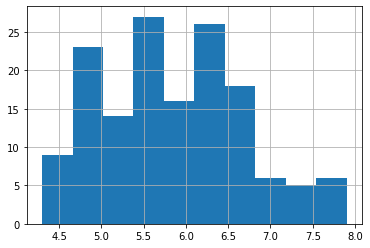

In [16]:
iris['SepalLengthCm'].hist()

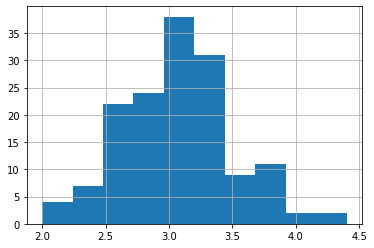

In [17]:
iris['SepalWidthCm'].hist()

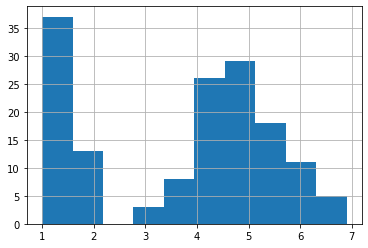

In [18]:
iris['PetalLengthCm'].hist()

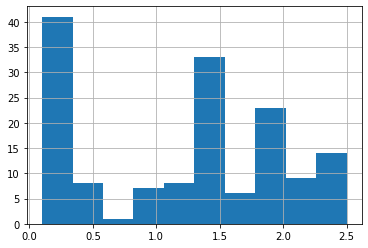

In [19]:
iris['PetalWidthCm'].hist()

In [20]:
# scatterplot
colours = ['red','green','pink']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']

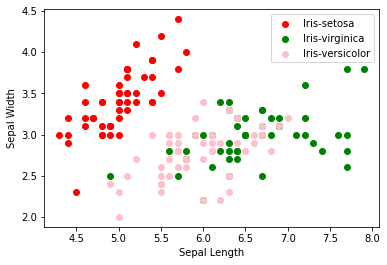

In [21]:
for i in range(3):
  x = iris[iris['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colours[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

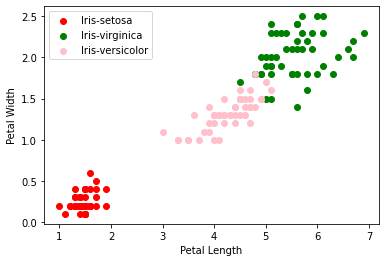

In [22]:
for i in range(3):
  x = iris[iris['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colours[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

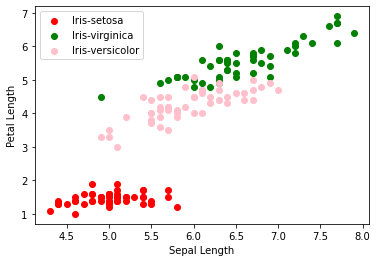

In [23]:
for i in range(3):
  x = iris[iris['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = colours[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

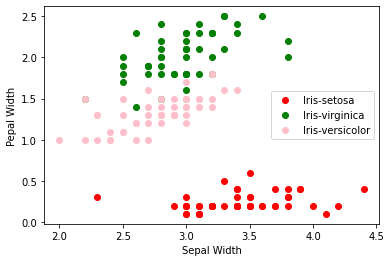

In [24]:
for i in range(3):
  x = iris[iris['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c = colours[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Pepal Width')
plt.legend()

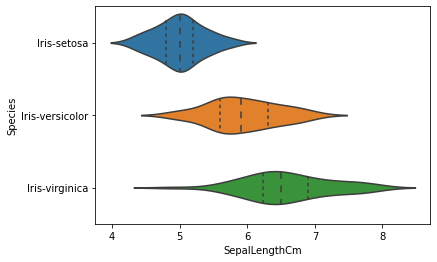

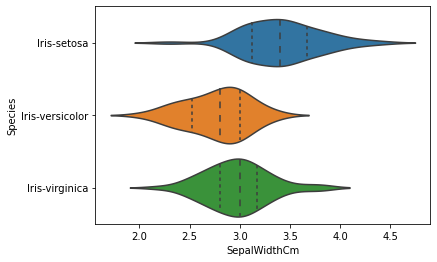

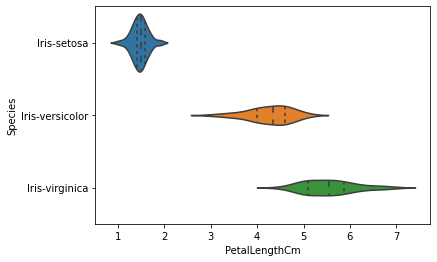

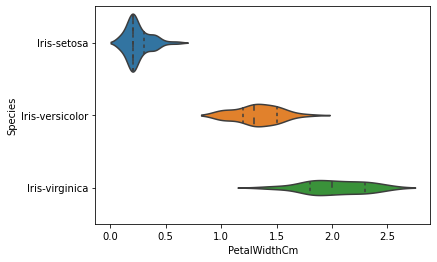

In [28]:
sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

#**LABEL ENCODER**

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [48]:
iris.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

#**MODEL TRAINING**

In [34]:
X = iris.drop(columns='Species', axis=1)
Y = iris['Species']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=2)

In [38]:
model = LogisticRegression()

In [39]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [45]:
print('Accuracy on Training data : ', training_data_accuracy*100)

Accuracy on Training data :  96.19047619047619


In [42]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [44]:
print('Accuracy on Test data : ', test_data_accuracy*100)

Accuracy on Test data :  100.0


#OPTIUM NUMBER OF CLUSTERS FOR K-MEANS

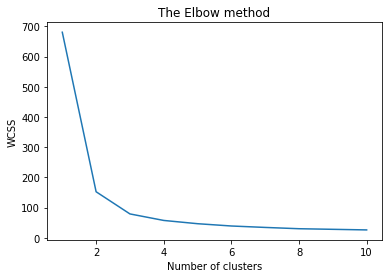

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values
#here we import KMeans algorithm using sklearn library
from sklearn.cluster import KMeans
#here we use the very first method is Elbow Method
wcss = []
#here WCSS means Within Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#now here we plotting above result in line graph format
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
so from above we choose The Number of Clusters = 3
                      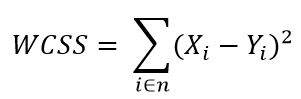



Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

#APPLYING K-MEANS METHOD ON GIVEN DATASET

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,
               n_init=10,random_state=5)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

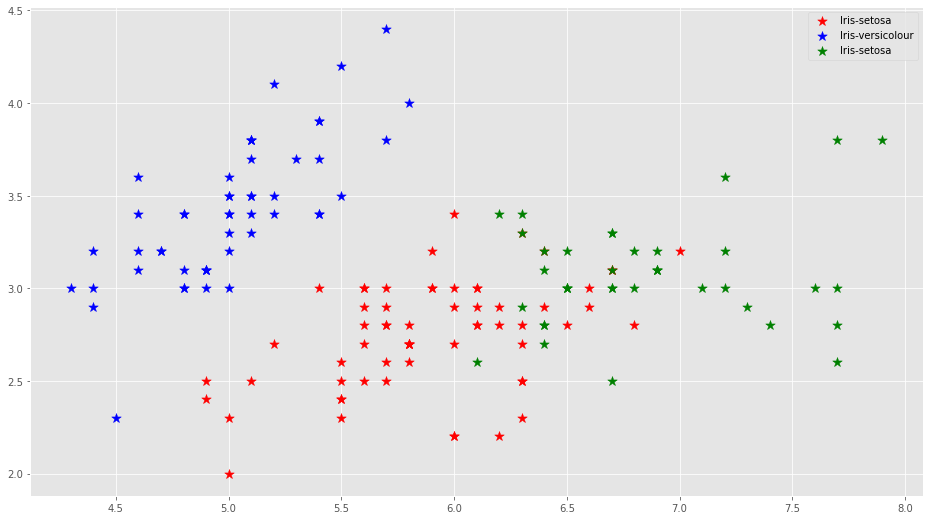

In [ ]:
# Visualizing the clusters
plt.figure(figsize = (16,9))
from matplotlib import style
style.use('ggplot')
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s = 100,
           c = 'red',label = 'Iris-setosa',marker='*')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s = 100,
           c = 'blue',label = 'Iris-versicolour',marker='*')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 100,
           c = 'green',label = 'Iris-setosa',marker='*')
plt.legend()

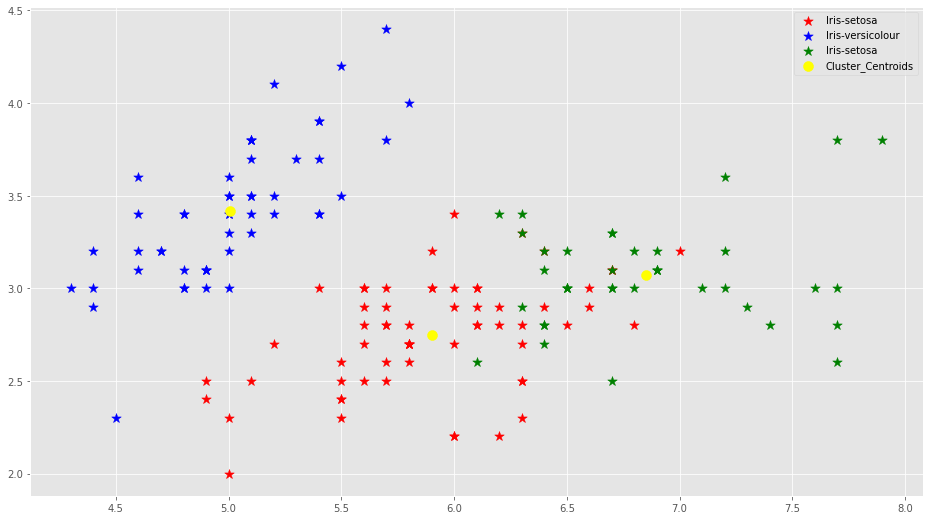

In [ ]:
#now we plotting Centroids of the clusters in above graph
plt.figure(figsize = (16,9))
style.use('ggplot')
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s = 100,
           c = 'red',label = 'Iris-setosa',marker='*')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s = 100,
           c = 'blue',label = 'Iris-versicolour',marker='*')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 100,
           c = 'green',label = 'Iris-setosa',marker='*')
#add centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Cluster_Centroids')
plt.legend()

Here we represent Cluster centers in Yellow spot.